In [1]:
import matplotlib.pyplot as plt
import numpy as np

from environment import MTurkSurveyUser

In [2]:
environment = MTurkSurveyUser([
        'survey/ver2_mturk/results/01_1st_Batch_3137574_batch_results.csv',
        'survey/ver2_mturk/results/02_Batch_3148398_batch_results.csv',
        'survey/ver2_mturk/results/03_Batch_3149214_batch_results.csv',
])

No record for day=0, location=0, activity=2, notification=0
No record for day=0, location=0, activity=2, notification=1
No record for day=0, location=0, activity=3, notification=0
No record for day=0, location=0, activity=3, notification=1
No record for day=0, location=0, activity=4, notification=0
No record for day=0, location=0, activity=4, notification=1
No record for day=0, location=1, activity=2, notification=0
No record for day=0, location=1, activity=2, notification=1
No record for day=0, location=1, activity=3, notification=0
No record for day=0, location=1, activity=3, notification=1
No record for day=0, location=1, activity=4, notification=0
No record for day=0, location=1, activity=4, notification=1
No record for day=1, location=0, activity=2, notification=0
No record for day=1, location=0, activity=2, notification=1
No record for day=1, location=0, activity=3, notification=0
No record for day=1, location=0, activity=3, notification=1
No record for day=1, location=0, activit

In [3]:
# environment profile
numTotalRecords = environment.getNumTotalRecords()
print("There are %d records in total." % numTotalRecords)
print("%d states have no samples." % environment.getNumNoDataStates())
numAccept = environment.getNumRecordsAcceptingNotification()
numIgnore = environment.getNumRecordsIgnoringNotification()
numDismiss = environment.getNumRecordsDismissingNotification()
ratioAccept = numAccept / numTotalRecords
ratioIgnore = numIgnore / numTotalRecords
ratioDismiss = numDismiss / numTotalRecords
print("Ratio of accepted notifications is %.2f%%" % (ratioAccept * 100.))
print("Ratio of ignored notifications is %.2f%%" % (ratioIgnore * 100.))
print("Ratio of dismissed notifications is %.2f%%" % (ratioDismiss * 100.))
print("Number of unique workers: %d" % environment.getNumUniqueWorkers())
workingTimeAvg, workingTimeStd = environment.getAvgWorkingTime()
print("Working time per task: %.1f +- %.2f secs" % (workingTimeAvg, workingTimeStd))

There are 3019 records in total.
24 states have no samples.
Ratio of accepted notifications is 41.80%
Ratio of ignored notifications is 31.53%
Ratio of dismissed notifications is 26.66%
Number of unique workers: 127
Working time per task: 18.9 +- 55.64 secs


In [4]:
# is there a bad worker?
workerAggregatedResponses = environment.getResponsesGroupByWorkers()
for worker in workerAggregatedResponses:
    numTotal, numAccepts, numIgnores, numDismisses = workerAggregatedResponses[worker]
    if numTotal >= 10:
        if numTotal in [numAccepts, numIgnores, numDismisses]:
            print("Flag worker (type A) \"%s\": accept=%d, ignore=%d, dismiss=%d"
                  % (worker, numAccepts, numIgnores, numDismisses))
for worker in workerAggregatedResponses:
    numTotal, numAccepts, numIgnores, numDismisses = workerAggregatedResponses[worker]
    if numTotal >= 20:
        if any([n / numTotal > 0.8 for n in [numAccepts, numIgnores, numDismisses]]):
            print("Flag worker (type B) \"%s\": accept=%d, ignore=%d, dismiss=%d"
                  % (worker, numAccepts, numIgnores, numDismisses))

Flag worker (type A) "A1P1O15RET85CN": accept=0, ignore=0, dismiss=37
Flag worker (type B) "A1P1O15RET85CN": accept=0, ignore=0, dismiss=37
Flag worker (type B) "A3683MQHQTG64Z": accept=56, ignore=13, dismiss=0


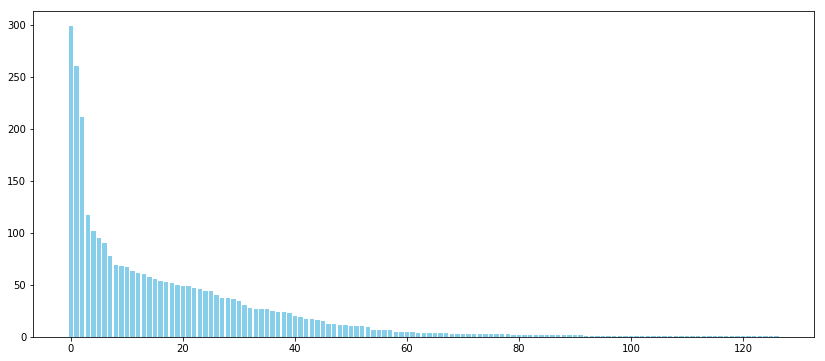

In [19]:
# show completed tasks per worker
workerResponses = environment.getResponsesGroupByWorkers()
workerTotalResponseCounts = [workerResponses[worker][0] for worker in workerResponses]
workerTotalResponseCounts.sort()
workerTotalResponseCounts.reverse()

fig, ax = plt.subplots(figsize=(14, 6))
ind = np.arange(len(workerTotalResponseCounts))
width = 0.8

rects = ax.bar(ind, workerTotalResponseCounts, width, color='SkyBlue', label='Counts')
plt.show()
fig.savefig("export_figures/mturk_responses_by_worker.pdf", bbox_inches='tight')